## Simulating the result
If the model displays all its features to your whishes, it is time to take her for a spin in TVB.
Remember that the model that was previously generated in the 1_RateML_ModGen.ipynb is now used in this simulation. Be sure that the python version is generated because a blank installation of TVB will not recognize this model. After generation it is always good to restart this kernel. Kernel > Restart Kernel ...
If it simulates, the time series of your generated model will be plotted on screen together with information on the model.

/opt/app-root/src/.local/lib/python3.8/site-packages/tvb/datatypes/surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


WARNING  File 'hemispheres' not found in ZIP.


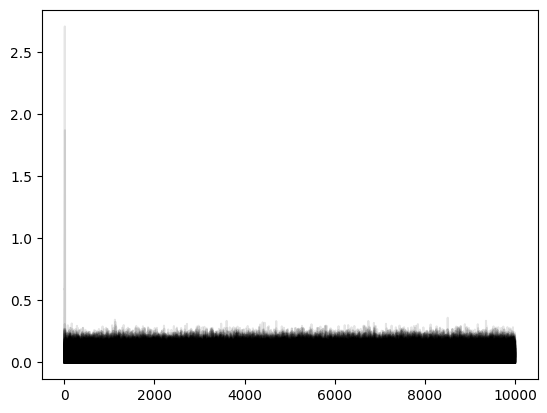

MontbrioT (
  Delta [min, median, max]  [0.7, 0.7, 0.7]
  Delta dtype ............. float64
  Delta shape ............. (1,)
  Gamma [min, median, max]  [5, 5, 5]
  Gamma dtype ............. float64
  Gamma shape ............. (1,)
  I [min, median, max] .... [0, 0, 0]
  I dtype ................. float64
  I shape ................. (1,)
  J [min, median, max] .... [14.5, 14.5, 14.5]
  J dtype ................. float64
  J shape ................. (1,)
  Type .................... MontbrioT
  cr [min, median, max] ... [1, 1, 1]
  cr dtype ................ float64
  cr shape ................ (1,)
  cv [min, median, max] ... [1, 1, 1]
  cv dtype ................ float64
  cv shape ................ (1,)
  eta [min, median, max] .. [-4.6, -4.6, -4.6]
  eta dtype ............... float64
  eta shape ............... (1,)
  gid ..................... UUID('b8956c46-2a8c-423d-9b32-ea6f94f82fe4')
  state_variable_boundaries  {'r': array([0.00000000e+000, 1.79769313e+308])}
  state_variable_range ...

(10000, 2, 76, 1)

In [1]:
from matplotlib.pyplot import *
%matplotlib inline

# from tvb.rateML.run.regular_run import regularRun
from tvb.simulator.lab import *
import numpy
# %tb

# Setting for paramsweeps can be found at The virtual brain: A simulator of primate brain network dynamics. 
simtime = 10e2
global_coupling = 0.45
global_speed = 3e-1
dt=.1
period = .1
nsig = .01

# other examples
# your_gen_model = 'Kuramoto'
# your_gen_model = 'RwongwangT'
# your_gen_model = 'ReducedWongWangExcInh'
# your_gen_model = "Generic2dOscillator"
# your_gen_model = "OscillatorT"
# your_gen_model = 'MontbrioPazoRoxin'
your_gen_model = 'MontbrioT'
model = 'models.' + your_gen_model + '()'
model = eval(model)
model.configure()

couplings=coupling.Linear(a=np.array(global_coupling), b=np.array(0.0))

source_file='connectivity_76.zip'
connectivity=connectivity.Connectivity.from_file(source_file)
connectivity.weights = connectivity.weights/(np.sum(connectivity.weights,axis=0)+1e-12)
connectivity.speed = np.array([global_speed])
connectivity.configure()

# integrator = integrators.EulerDeterministic(dt=dt)
integrator=integrators.EulerStochastic(dt=dt, noise=noise.Additive(nsig=numpy.array([nsig])))
# integrator = integrators.HeunDeterministic(dt=dt)
# integrator=integrators.HeunStochastic(dt=dt, noise=noise.Additive(nsig=numpy.array([nsig])))

monitorsen = (monitors.TemporalAverage(period=period))

sim = simulator.Simulator(model=model, connectivity=connectivity,
								coupling=couplings,
								integrator=integrator,
								monitors=[monitorsen])
sim.configure()
# sim.history.buffer[:] = 0.0
# sim.current_state[:] = 0.0
# print('shb', sim.history.buffer.shape)  # ('n_time', 'n_cvar', 'n_node', 'n_mode')

(time, data) = sim.run(simulation_length=simtime)[0]


figure()
plot(data[:, 0, :, 0], 'k', alpha=0.1)
show()
print(model)
data.shape


## Plotting some more
Next plots show the firing rate and the membrane potential. The two states of the montbrio model. 

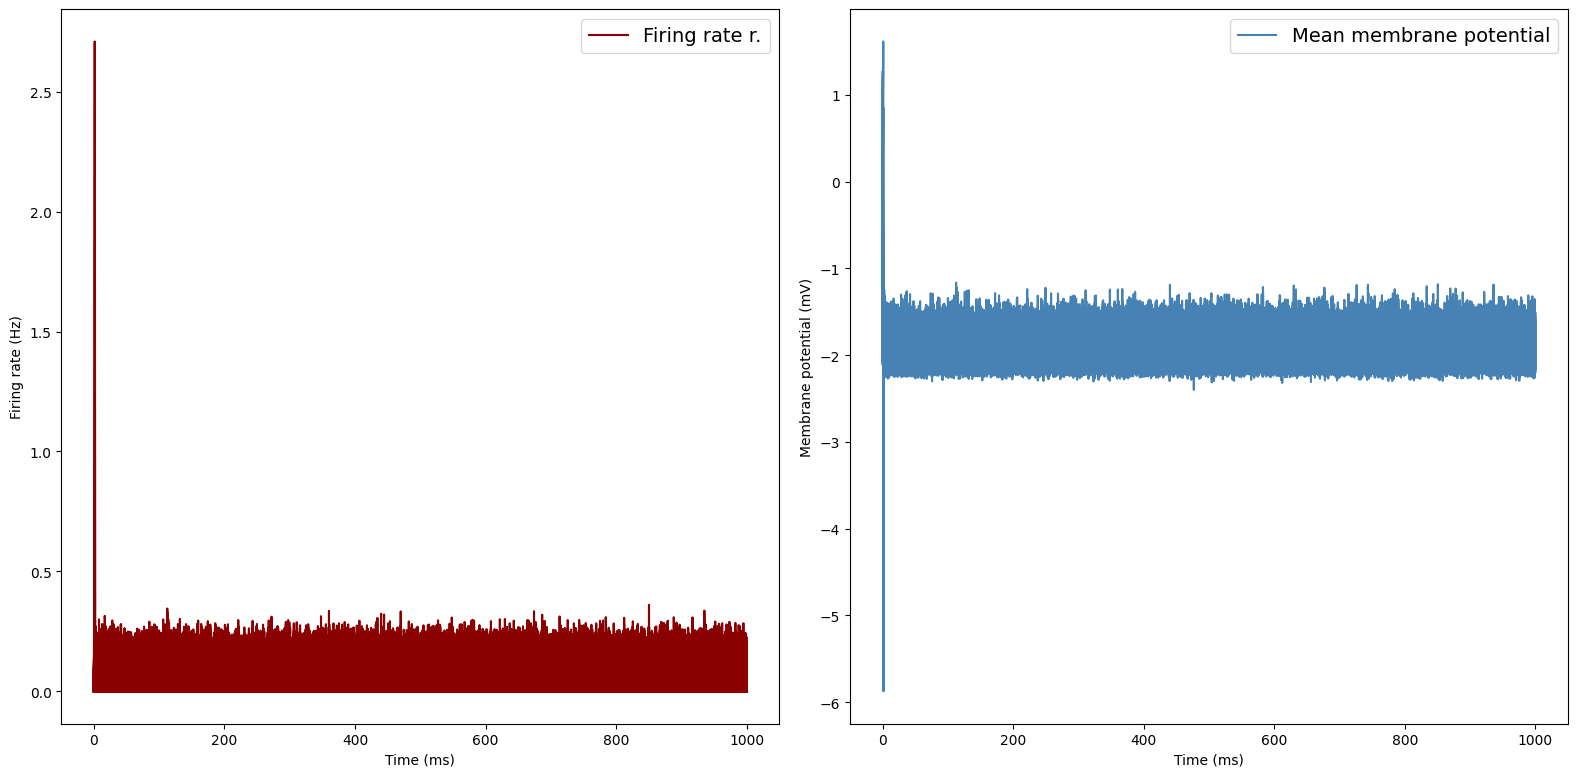

In [2]:
#%% plot simulation results for each b value:
import matplotlib.pyplot as plt
%matplotlib inline


# fig, axes = plt.subplots(2,2,figsize=(16,8))

fig, axes = plt.subplots(1,2,figsize=(16,8))

plt.rcParams.update({'font.size': 14})


'''plot traces'''
Li = axes[0].plot(time,data[:, 0, :, 0],color='darkred') # [times, regions]
Le = axes[1].plot(time,data[:, 1, :, 0],color='SteelBlue') # [times, regions]

# axes[1,simnum].plot(time_s,Ad_exc[simnum],color='goldenrod') # [times, regions]

axes[0].set_xlabel('Time (ms)')
axes[1].set_xlabel('Time (ms)')

axes[0].set_ylabel('Firing rate (Hz)')
axes[1].set_ylabel('Membrane potential (mV)')

# axes[0,simnum].set_ylim([-15,55])
axes[0].legend([Li[0]], ['Firing rate r.'], loc='best')
axes[1].legend([Le[0]], ['Mean membrane potential'], loc='best')

# for ax in axes.reshape(-1):
#     ax.set_xlim([3,5])
#     ax.set_xticks([3,3.5,4,4.5,5])

plt.tight_layout()
plt.show()